# Statistics in Python | EuroSciPy 2015 | Gaël Varoquaux

https://www.youtube.com/watch?v=yaSgoGLXKOg


## Why Python for statistics?

R is a language dedicated to statistics. Python is a general-purpose language with statistics modules. R has more statistical analysis features than Python, and specialized syntaxes. However, when it comes to building complex analysis pipelines that mix statistics with e.g. image analysis, text mining, or control of a physical experiment, the richness of Python is an invaluable asset.


## 1. Data representation and interaction

### 1.1 Data as a table

The setting that we consider for statistical analysis is that of multiple observations or samples described by a set of different attributes or features. The data can than be seen as a 2D table, or matrix, with columns giving the different attributes of the data, and rows the observations. For instance, the data contained in examples/brain_size.csv.

In [138]:
!cat datasets/brain_size.csv

"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
"6";"Female";99;90;110;"146";"69.0";928799
"7";"Female";138;136;131;"138";"64.5";991305
"8";"Female";92;90;98;"175";"66.0";854258
"9";"Male";89;93;84;"134";"66.3";904858
"10";"Male";133;114;147;"172";"68.8";955466
"11";"Female";132;129;124;"118";"64.5";833868
"12";"Male";141;150;128;"151";"70.0";1079549
"13";"Male";135;129;124;"155";"69.0";924059
"14";"Female";140;120;147;"155";"70.5";856472
"15";"Female";96;100;90;"146";"66.0";878897
"16";"Female";83;71;96;"135";"68.0";865363
"17";"Female";132;132;120;"127";"68.5";852244
"18";"Male";100;96;102;"178";"73.5";945088
"19";"Female";101;112;84;"136";"66.3";808020
"20";"Male";80;77;86;"180";"70.0";889083
"21";"Male";83;83;86;".";".";892420
"22";"Male";97;107;84;"186"

### 1.2 The pandas data-frame

We will store and manipulate this data in a pandas.DataFrame, from the pandas module. It is the Python equivalent of the spreadsheet table. It is different from a 2D numpy array as it has named columns, can contain a mixture of different data types by column, and has elaborate selection and pivotal mechanisms.

### 1.2.1 Creating dataframes: reading data files or converting arrays

Reading from a CSV file: Using the above CSV file that gives observations of brain size and weight and IQ (Willerman et al. 1991), the data are a mixture of numerical and categorical values.

In [139]:
import pandas as pd

data = pd.read_csv("datasets/brain_size.csv", sep=";")
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


The weight of the second individual is missing in the CSV file marked with a dot. If we don’t specify the missing value (NA = not available) marker, we will not be able to do statistical analysis. 

Let's do it.

In [140]:
data = pd.read_csv("datasets/brain_size.csv", sep=";", na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


Now not available data is represented as `NaN`.

#### Creating from arrays

A pandas.DataFrame can also be seen as a dictionary of 1D ‘series’, eg arrays or lists. If we have 3 numpy arrays.

In [141]:
import numpy as np

t = np.linspace(-6, 6, 10)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [142]:
pd.DataFrame({"t": t, "sin": sin_t, "cos": cos_t})

,cos,sin,t
0,0.960170,0.279415,-6.000000
1,-0.045706,0.998955,-4.666667
2,-0.981674,0.190568,-3.333333
3,-0.416147,-0.909297,-2.000000
4,0.785887,-0.618370,-0.666667
5,0.785887,0.618370,0.666667
6,-0.416147,0.909297,2.000000
7,-0.981674,-0.190568,3.333333
8,-0.045706,-0.998955,4.666667
9,0.960170,-0.279415,6.000000


#### Other inputs

pandas can input data from SQL, excel files, or other formats. See the pandas [documentation](http://pandas.pydata.org/).

### 1.2.2 Manipulating data

`data` is a pandas.DataFrame, that resembles R’s dataframe.

In [143]:
data.shape

(40, 8)

In [144]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [145]:
data["Gender"]

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

In [146]:
data[data["Gender"] == "Female"]["VIQ"].mean()

109.45

In [147]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


groupby: splitting a dataframe on values of categorical variables.

groupby_gender is a powerful object that exposes many operations on the resulting group of dataframes.

In [148]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [149]:
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


Use tab-completion on groupby_gender to find more. Other common grouping functions are median, count (useful for checking to see the amount of missing values in different subsets) or sum. Groupby evaluation is lazy, no work is done until an aggregation function is applied.

### 1.2.3 Plotting data

Pandas comes with some plotting tools (pandas.tools.plotting, using matplotlib behind the scene) to display statistics of the data in dataframes.

#### Scatter matrices

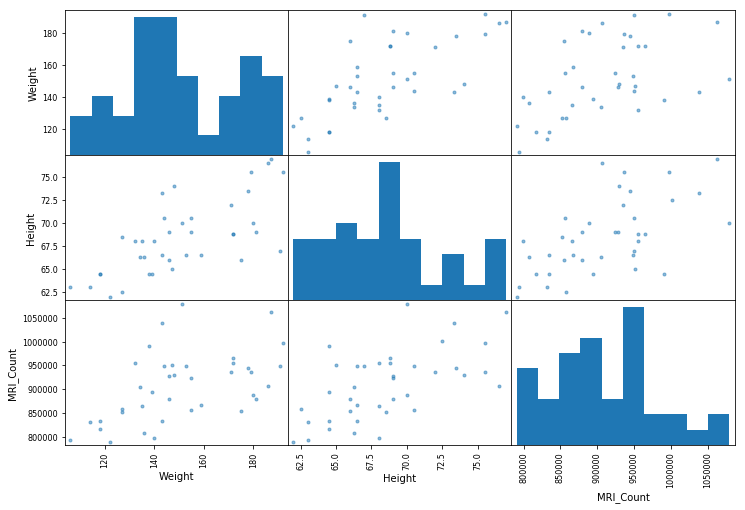

In [150]:
from pandas.tools import plotting
%matplotlib inline

plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']], figsize=(12, 8)); 

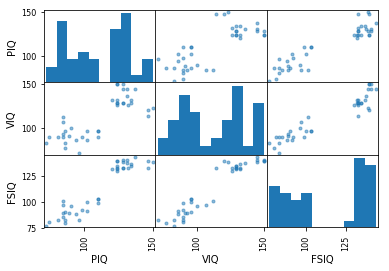

In [151]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

We see two clusters in these attributes values. Maybe it is caused because of different results for males and females? Let's do the same for both males and females separately.

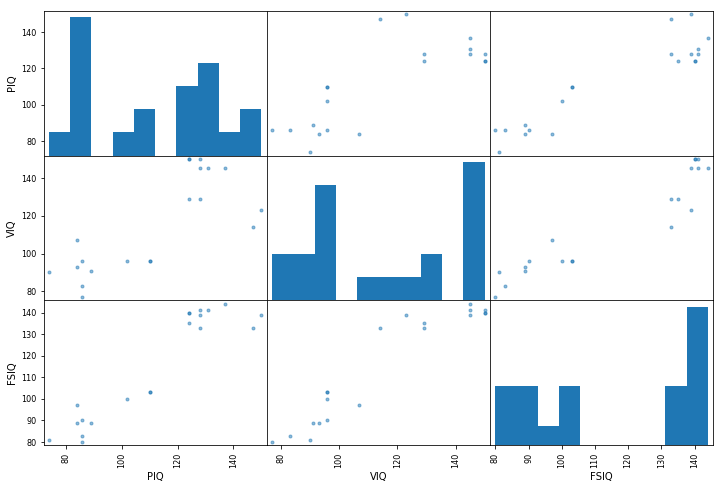

In [152]:
plotting.scatter_matrix(groupby_gender.get_group("Male")[['PIQ', 'VIQ', 'FSIQ']], figsize=(12, 8));

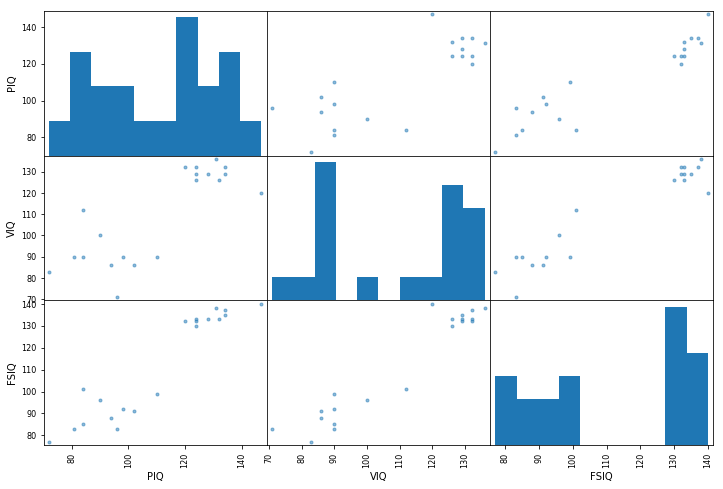

In [153]:
plotting.scatter_matrix(groupby_gender.get_group("Female")[['PIQ', 'VIQ', 'FSIQ']], figsize=(12, 8));

The two clusters are not caused by difference between males and females. 

Sidenote: it is really important to do both data visualization and later hypothesis testing.

## 2. Hypothesis testing: comparing two groups

We can ask question whether there is a significant difference between males an females different types of IQs.

We can compute the mean of one and the mean of the other and claim we found the difference. This without hypothesis testing is meaningless.

Hypothesis testing and p-value give you the significance of an effect / difference

For simple statistical tests, we will use the scipy.stats sub-module of scipy.

In [154]:
from scipy import stats

### 2.1 Student's t-test: the simplest statistical test

### 2.1.1 1-sample t-test: testing the value of a population mean

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help).

Let's test if `VIQ` mean value is significantly different from 0 with null hypothesis thta `VIQ` is zero.

In [155]:
stats.ttest_1samp(data["VIQ"], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

`ttest_1samp` returns t-statistic and a two-tailed p-value. 

The t-statistic is the value returned from a test and the bigger it is the more significant the result is: further from the center of t distribution. It is an effect divided by the standard error. So if standard error (and standard deviation) is much bigger than the effect than it is not significant.

The p-value in statistic is the probability of the null hypothesis to be true for this t-test result. Or differently: the probability of of this results occuring if the H0 was true. In paper exercises we just claimed that `p < 0.05` and here we compute it exactly.

Here we are testing whether VIQ is equal to 0. With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

Let's now test that `VIQ` is 1000 (null hypothesis says that `VIQ` is 1000).

In [156]:
stats.ttest_1samp(data["VIQ"], 1000)

Ttest_1sampResult(statistic=-237.71875335224217, pvalue=2.8655601824775701e-63)

pvalue is very low meaning that the probability of H0 to be true is very low. So we reject the null hypothesis.

And finally let's test the null hypothesis that `VIQ` mean value is 112.35. It is the exact mean value for this attribute.

In [157]:
stats.ttest_1samp(data["VIQ"], 112.35)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

We see that resulting t statistic is 0.0 meaning that it is in the middle of t distribution. p-value for this null hypothesis is 1, meaning that it is certain that H0 is true.

The common threshold for rejecting the H0 is p-value < .05.

### 2.1.2 2-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind().

**So we test here whether the differences between two groups in the dataset are significant or not. Exactly like testing males and females on Titanic dataset or group a and b in Wikipedia dataset analysis.**

In [158]:
female_viq = data[data["Gender"] == "Female"]["VIQ"]
male_viq = data[data["Gender"] == "Male"]["VIQ"]
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

In [159]:
female_viq.mean(), female_viq.std()

(109.45, 21.670924008182507)

In [160]:
male_viq.mean(), male_viq.std()

(115.25, 25.640993083650045)

pvalue is 0.44. This means that the result is strongly not significant.

### 2.2 Paired tests: repeated measurements on the same indivuals

We have different ways to measure IQ. PIQ, VIQ, and FSIQ give 3 measures of IQ. Let us test if FISQ and PIQ are significantly different. We can use a 2 sample test.

In [161]:
stats.ttest_ind(data["FSIQ"], data["PIQ"])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”.

In [162]:
stats.ttest_rel(data["FSIQ"], data["PIQ"])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

The result is insignificant. Let's remember we have only 40 measurements here. If we will have more there is a chance that the result will be significant. More statistical power.

This is equivalent to a 1-sample test on the difference.

In [163]:
stats.ttest_1samp(data["FSIQ"] - data["PIQ"], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption. It requires more data and it looks how many time the data does a cross over between.

In [164]:
stats.wilcoxon(data["FSIQ"], data["PIQ"])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

The test gives us the bigger p-value so smaller significance on the same data.

The corresponding test in the non paired case is the Mann–Whitney U test, scipy.stats.mannwhitneyu().

The t-test, Wilcoxon and Mann-Whitney are the most usefull tests.

### 2.3 Exercise

Let's test the difference between weights in males and females.

In [165]:
female_weight = data[data["Gender"] == "Female"]["Weight"]
male_weight = data[data["Gender"] == "Male"]["Weight"]
stats.ttest_ind(female_weight, male_weight.dropna())

Ttest_indResult(statistic=-4.8709509219406959, pvalue=2.2272930183621181e-05)

There is a significant difference. Who is heavier here? We will know this from t-statistic value. We subtract the means in numerator and we subtract males weight mean from females weight mean. Result is negative meaning that males mean weight is bigger than females.

## 3. Linear models, multiple factors, and analysis of variance

The previous way of testing is a bit tedious. It is quite easy to get it wrong. It is usefull however when we code our own logic: writing the test yourself or writing data selectors (columns) yourself. 

Now we will learn how to do the same and much more in more powerful way.

### 3.1 “formulas” to specify statistical models in Python

Formulas (with categorical variables) enable you to express rich links in your data

### 3.1.1 A simple linear regression

Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

y = x * coef + intercept + e
where e is observation noise. 

We will use the statsmodels module to:
* Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
* Test that coef is non zero.

Read more about formulas in in statsmodels [documentation](http://www.statsmodels.org/stable/example_formulas.html).

First, we generate simulated data according to the model:

In [166]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# Normal distributed noise.
y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({"x": x, "y": y})
data

,x,y
0,-5.000000,-13.502619
1,-4.473684,-20.868078
2,-3.947368,-18.954792
3,-3.421053,-19.555032
4,-2.894737,-10.222580
5,-2.368421,-21.311418
6,-1.842105,-3.547069
7,-1.315789,-11.992196
8,-0.789474,-6.092265
9,-0.263158,-6.786955


Then we specify an OLS model and fit it.

In [167]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

We can inspect the various statistics derived from the fit.

In [168]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 03 Jan 2018   Prob (F-statistic):           8.56e-08
Time:                        13:12:15   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000        -7.710    -3.357
x              2.9369      0.341      8.604      0.000         2.220     3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is the summary of what the model has learned. It says:
* Dep. Variable: - the dependent variable was y
* Model: and Method: - it used an ordinary least square
* Date and Time - when it was created
* No. Observations: - how many observations were there 

The most important for us is the part with intercept and x. It gives us the coefficient, standard error for both linear equation intercept and slope. Then it gives t-statistics and corresponding p-values. In this casse p-value is very small because the t-statistic is large. Then it gives us the confidence interval meaning that coefficient can lie anywhere between -7.710 and -3.357 in case of intercept and between 2.220 and 3.654 for slope. 

We generated the data with following code:
`y = -5 + 3 * x + 4 * np.random.normal(size=x.shape)`
meaning that we expected intercept to be -5 and x coefficient to be 3. The fit we got is pretty good since the values are in the confidence intervals.

Let's get fitted model params.

In [169]:
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

Statsmodels uses a statistical terminology: the y variable in statsmodels is called ‘endogenous’ while the x variable is called exogenous. This is discussed in more detail [here](http://www.statsmodels.org/devel/endog_exog.html).

To simplify, y (endogenous) is the value you are trying to predict, while x (exogenous) represents the features you are using to make the prediction.

### 3.1.2 Categorical variables: comparing groups or multiple categories

Let us go back the data on brain size.

In [170]:
data = pd.read_csv('datasets/brain_size.csv', sep=';', na_values=".")

In [171]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


Data in `Gender` attribute is not a numerical data. It is a categorical variable. 

We can write a linear models that csn use categorical variable. We can write a comparison between IQ of male and female using a linear model.

In [ ]:
model = ols("VIQ ~ Gender + 1", data).fit()

We look at the summary once again.

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 03 Jan 2018   Prob (F-statistic):              0.445
Time:                        13:13:00   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000        98.704   120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445        -9.397    20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We again get the intercept: 109.45. We get the offset for males - the offect of male on the intercept: 5.8. We have the standard errors for both values and t-values. p-value for gender related impact is large so the effect is not significant. 

This means that according to this model and our data the mean `VIQ` is around 110 (so significantly non zero) and difference between males and females in terms of `VIQ` is not-significant. Therefore we should not report it - we should now say "difference between males or females is 5.8 but it is not significant". This is bullshit. So we see this but it does not mean anything. 

**Again this testing should go to Titanic - males and females etc. Let's use statsmodels and formulas rather than scipy ttest functions.**

### 3.1.3 Forcing categorical

Statsmodels was clever to detect that `Gender` qas a categorical variable and thus each of its different values are treated as different entities. But if I had coded gender as 0s and 1s than it would think that it is a numerical variable. Then we need to force it to treat a variable as categorical variable using this syntax.

In [175]:
model = ols("VIQ ~ C(Gender)", data).fit()

### 3.1.4 Intercept

We can remove the intercept using - 1 in the formula, or force the use of an intercept using + 1.


### 3.1.5 Contrast Coding Systems for categorical variables

By default, statsmodels treats a categorical variable with K possible values as K-1 ‘dummy’ boolean variables (the last level being absorbed into the intercept term). This is almost always a good default choice - however, it is possible to specify different encodings for categorical variables. Read more about it [here](http://statsmodels.sourceforge.net/devel/contrasts.html).






### 3.1.6 Link to t-tests between different FSIQ and PIQ

We can redo the test between FSIQ and PIQ. We have a slight difficulty here. Let's look at our data.

In [176]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


FSIQ and PIQ are in different columns. We can express FSIQ - PIQ accross subjects but we cannot do a test of FSIQ vs. PIQ.

To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable.

In [178]:
data_fisq = pd.DataFrame({"iq": data["FSIQ"], "type": "fsiq"})
data_fisq.head()

,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq


In [179]:
data_piq = pd.DataFrame({"iq": data["PIQ"], "type": "piq"})
data_piq.head()

,iq,type
0,124,piq
1,124,piq
2,150,piq
3,128,piq
4,134,piq


In [182]:
data_long = pd.concat([data_fisq, data_piq], axis=0)
data_long

,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq
5,99,fsiq
6,138,fsiq
7,92,fsiq
8,89,fsiq
9,133,fsiq



So now we have a dataframe with one numerical variable and one with categorical. We can answer how IQ depends on the type of IQ. 

We take two columns of similar nature, concatenate them and add categorical column with the type. This is done quite often in practical work. We switch from pair statistics view to a non-pair statistic view.  

We can test both against each other now. 

In [183]:
model = ols("iq ~ type", data_long).fit()

In [184]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Wed, 03 Jan 2018   Prob (F-statistic):              0.643
Time:                        14:01:59   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      0.000       106.119   120.781
type[T.piq]    -2.4250      5.208     -0.466      0.643       -12.793     7.943
==============================================================================
Omnibus:                      164.598   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.062
Skew:                          -0.110   Prob(JB):                       0.0178
Kurtosis:                       1.461   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that we retrieve the same values for t-test and corresponding p-values for the effect of the type of IQ than the previous t-test.

In [185]:
stats.ttest_ind(data["FSIQ"], data["PIQ"])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

In the framework of formulas we can compare two populations exactly like we compare them with a t-test.

### 3.2 Multiple Regression: including multiple factors

We can now start adding different factors. 

Consider a linear model explaining a variable z (the dependent variable) with 2 variables x and y:

z = x*c1 + y*c2 + i +e

Such a model can be seen in 3D as fitting a plane to a cloud of (x, y, z) points.

#### Example: the iris data

Iris dataset measures petal and sepal width and length accross different iris species.

Sepal and petal size tend to be related: bigger flowers are bigger! But is there in addition a systematic effect of species?

We can answer this question using formulas.

In [188]:
data = pd.read_csv("datasets/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We now ask how does the sepal width depend on the name of the iris which is a categorical variable and petal length which is a continous variable. Statmodels will build model to fit this including variables types.

In [189]:
model = ols("sepal_width ~ name + petal_length", data).fit()

In [190]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Wed, 03 Jan 2018   Prob (F-statistic):           1.58e-20
Time:                        14:10:21   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000         2.785     3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000        -1.840    -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000        -2.169    -1.158
petal_length           0.2983      0.061      4.920      0.000         0.178     0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get the intercept - which we are not interested in. We have two different species of iris. And we have a petal length. For each one of these I can look at the p-value. Is there an effect of petal_length on sepal_width. P-value says yes. Is there an effect that iris is virginica: again yes.

Nice thing about formula framework is that we can built model for multiple variables at once. if we were building it manually we would have to keep track of all the relationships and feed this into t-test. Do not do this!

### 3.3 Post-hoc hypothesis testing: analysis of variance (ANOVA)

We can do a post-hoc test - like if we cared only about the difference between this and that variable - I can write a contrast vector.

In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test:

So from above we drop intercept, drop name[T.versicolor] and take name[T.virginica] minus petal_length.

In [191]:
model.f_test([0, 1, -1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 3.24533535]]), p=0.07369058781700577, df_denom=146, df_num=1>

Is this difference significant? No because p > 0.05.

We have done here much more that testing if we have checked the difference between versica and virginica removing the effect of petal length. That is really important. When we model real world usecases like is there a relation between wage and experience removing education effect.

#### Exercise

Going back to the brain size + IQ data, test if the VIQ of male and female are different after removing the effect of brain size, height and weight.